In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
data = pd.read_csv("../Data/raw/churn-data.csv", usecols=range(1, 14))

# Check first few rows
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Shape of the data.
data.shape

(10000, 13)

In [4]:
# Metadata information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


- *The dataset has 10000 rows and 12 columns*
- *There are no missing values as each column has 10000 rows of non-null vlaues which is same as total rows.*
- *The data types of columns looks good.*

In [5]:
# Remove duplicates if any 
# Check for unique customer id
print("Number of unique customers in dataset::", data.CustomerId.nunique())
print("Number of duplicates in data::", data.duplicated().sum().item())

Number of unique customers in dataset:: 10000
Number of duplicates in data:: 0


In [6]:
# Rename the column names
data.columns = data.columns.map(lambda x: x.lower())
col_names = {
    'customerid': 'customer_id',
    'creditscore': 'credit_score',
    'numofproducts': 'num_of_products',
    'hascrcard': 'has_cr_card',
    'isactivemember': 'is_active_member',
    'estimatedsalary': 'salary',
    'exited': 'churn'
}

data.rename(columns = col_names, inplace=True)

In [7]:
# Change string values in lowercase.
for col in data.select_dtypes(object):
    data[col] = data[col].str.lower()

In [8]:
# Split the data in training, validation and test datasets.
from sklearn.model_selection import train_test_split
df_full, df_test = train_test_split(data, test_size=0.3, random_state=42)
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

## Data Analysis

### Numerical Attribute *Distributions*

In [9]:
num_cols = ['credit_score', 'age', 'balance', 'salary']
df_train[num_cols].describe()

,credit_score,age,balance,salary
count,5250.000000,5250.00000,5250.000000,5250.000000
mean,652.436762,38.91581,75913.637337,101117.917192
std,96.340623,10.52543,62631.671015,57590.907842
min,350.000000,18.00000,0.000000,90.070000
25%,586.000000,32.00000,0.000000,51880.892500
50%,654.000000,37.00000,95507.660000,101335.995000
75%,719.000000,44.00000,127843.757500,150761.822500
max,850.000000,92.00000,250898.090000,199970.740000


In [10]:
# Function to plot hist plots
def hist_plot(column, bins):
    fig = plt.figure(figsize=(7, 5))
    
    sns.histplot(df_train, x=column, stat='frequency', kde=True, bins=bins)
    column = column.replace("_", " ").capitalize()
    
    plt.title(f"Distribution of {column}", size=11)
    plt.xlabel(f"{column}", size=10)
    plt.ylabel("frequency", size=10)
    
    plt.grid(ls="--", color='gray', alpha=0.5)
    plt.show()
    

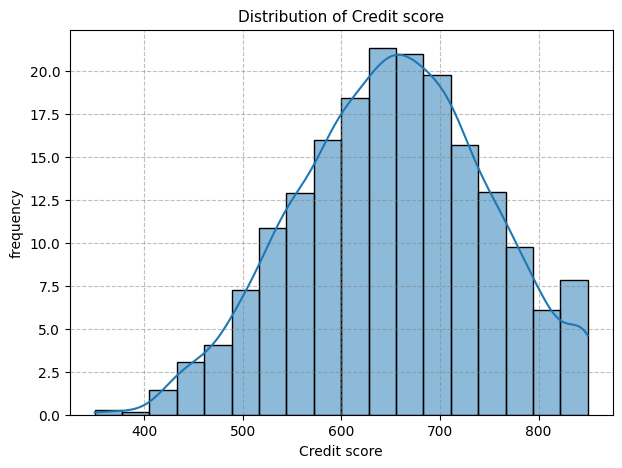

In [11]:
# Histogram plot for Credit Score
hist_plot('credit_score', bins=18)

- *The histgram plot shows the distribution of credit score. The data follows the normal distribution with slight left skewness.*

Let's check statistically if there is any skewness present in the data.

In [12]:
df_train.credit_score.skew()

np.float64(-0.0890176879596787)

- *The negative skew value -0.089, indicate the left skewness in the data however, it is very small.*

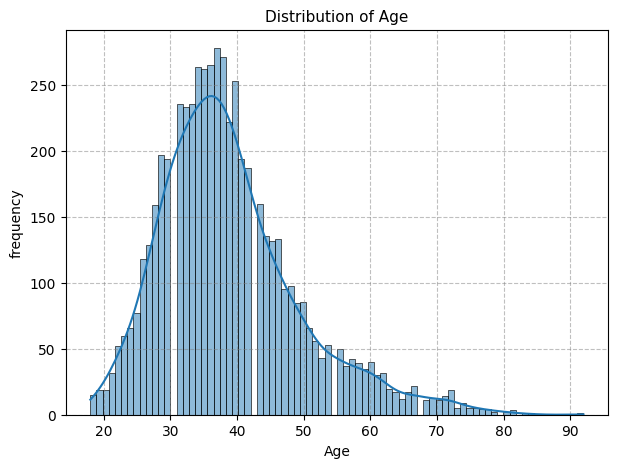

In [13]:
# Histogram plot for Age
hist_plot('age', bins=80)

- *The above histogram plot shows the distribution for Age of the customers.*
- *It shows the age-groups in data and follows the perfect normal distribution for the age group from the 18 to ~60-65, and then we can observed some skewness in the data.*
- *The plot also shows that the data might have some potential outliers.*

Let's check skewness in data again.

In [14]:
# Check if data follows right skewed distribution
df_train.age.skew()

np.float64(0.9979496197517297)

- *The skewness in data is 0.998. The positive value indicates that the data is highly right skewed.*
- *The skewness in data is may be becuase of the few occurance of the large values of the age. As we saw earlier the maximum age value in data is 92.*

Let's check the number of records in data with age equal to 92.

In [15]:
# Number of rows == age == 92
df_train[df_train.age == 92]

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,salary,churn
6443,15764927,rogova,753,france,male,92,3,121513.31,1,0,1,195563.99,0


- *You can drop the rows with age 92, as there are only one entry.*
- *But, it looks genuine as the age of the bank customer can be 92. So, I am keeping it.*

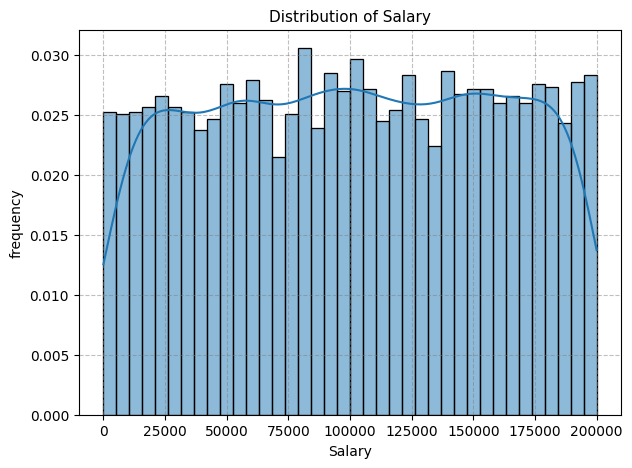

In [16]:
# Histogram plot for salary
hist_plot('salary', bins=38)

- *The above histplot represents the uniform salary distribution.*

In [17]:
# Check skewness in data.
df_train.salary.skew()

np.float64(-0.017164743367570377)

- *The negative skew value indicate that data is left skewed. However the value is very small.*

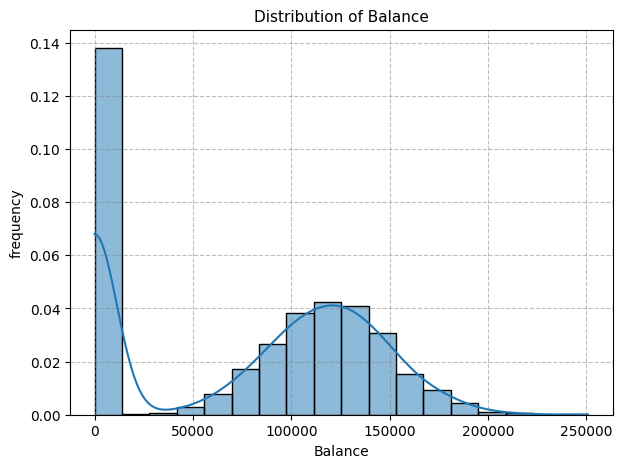

In [18]:
# Histogram plot for Balance
hist_plot('balance', bins=18)

- *The above histogram plot show the bi-model distribution for the 'balance' attribute.*
- *We can see that there are clearly two groups - one with number of customers with no balance, while other is customers with balance in bank account.*
- *We can see the data with balance amount follows the normal distribution.*
- *Further, to work with bi-model data, we can create a new column for attribute that represents group for 'balance' or 'no balance' value customers.*

In [19]:
# Check distributions of customer data with balance in account
df_train[df_train.balance > 0].balance.describe()

count      3327.000000
mean     119791.582813
std       30544.192761
min       12459.190000
25%       99075.975000
50%      120094.930000
75%      140003.655000
max      250898.090000
Name: balance, dtype: float64

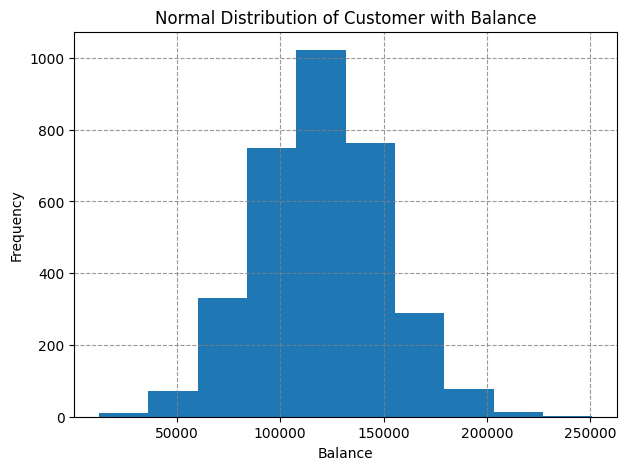

In [20]:
balance_data = df_train[df_train.balance > 0]
balance_data.balance.plot(kind='hist', 
                          figsize=(7, 5), 
                          title='Normal Distribution of Customer with Balance',
                          xlabel='Balance')
plt.grid(ls="--", color='gray', alpha=0.8);

### Categorical Attribute *Distributions*

In [21]:
# Print the unique values in categorical columns.
cat_cols = ['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member', 'churn']
for col in cat_cols:
    print(df_train[col].value_counts())
    print("-----------")

geography
france     2632
germany    1313
spain      1305
Name: count, dtype: int64
-----------
gender
male      2888
female    2362
Name: count, dtype: int64
-----------
tenure
2     557
7     546
1     544
4     540
5     538
8     528
9     522
3     511
6     498
10    257
0     209
Name: count, dtype: int64
-----------
num_of_products
1    2682
2    2386
3     147
4      35
Name: count, dtype: int64
-----------
has_cr_card
1    3708
0    1542
Name: count, dtype: int64
-----------
is_active_member
1    2739
0    2511
Name: count, dtype: int64
-----------
churn
0    4141
1    1109
Name: count, dtype: int64
-----------


- *The values counts shows both balance and imbalance in data distribution in categorical variables.*
- *The distribution of 'has_cr_card' and 'churn' columns seems similar and It is interesting to further evaluate their relationship.*

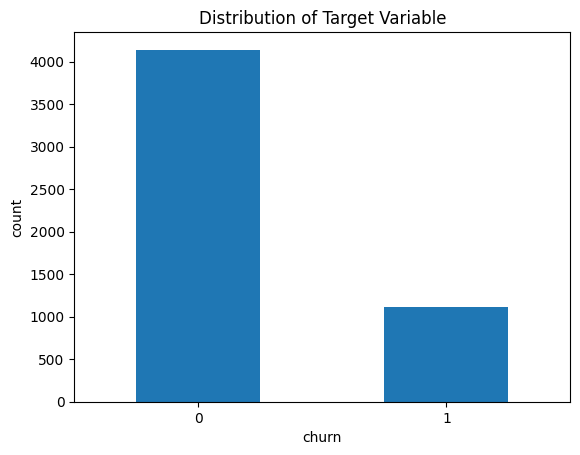

In [22]:
df_train.churn.value_counts().plot(kind='bar',
                               title='Distribution of Target Variable', 
                               ylabel='count')

plt.xticks(rotation=0);

- *The above bar plot shows the distribution of churn class labels.*
- *It shows the imbalance class distribution as number of customer who had churn is significantly smaller than the number of customers not churned.*

### Correlation analysis between the features and target variable.

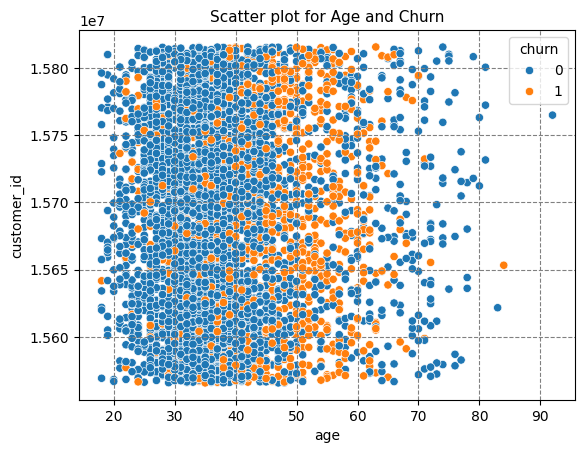

In [23]:
sns.scatterplot(data=df_train, x='age', y='customer_id', hue='churn')
plt.title("Scatter plot for Age and Churn", size=11)
plt.grid(ls='--', color='gray');

- *The above scatter plot shows the patterns of churn rate between the age of the customer and target variable 'churn'.*
- *There is no linear relation between age of customer and churn rate.*
- *However, we can see cluster between the age values of 45 to 65 indicates the possible high churned rate.*

In [24]:
# Create new feature age-group.
def age_binning(data):
    bins = np.linspace(start=17, stop=92, num=6, dtype='int')
    labels=['18-32', '33-47', '48-62', '63-77', '78-92']
    age_group = pd.cut(x=data['age'], bins=bins, labels=labels)
    return age_group

df_train['age_group'] = age_binning(df_train)
df_test['age_group'] = age_binning(df_test)
df_val['age_group'] = age_binning(df_val)

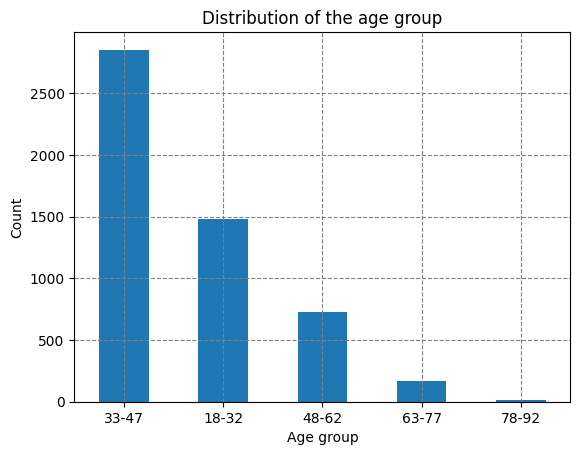

In [25]:
# Distribution of age_group values
df_train.age_group.value_counts().plot(kind='bar', 
                                       title='Distribution of the age group',
                                       xlabel='Age group',
                                       ylabel='Count')
plt.xticks(rotation=0)
plt.grid(ls='--', color='gray');

- *The above plot shows the count of age groups. The most common age of cusotmers in dataset is in between 32-46*

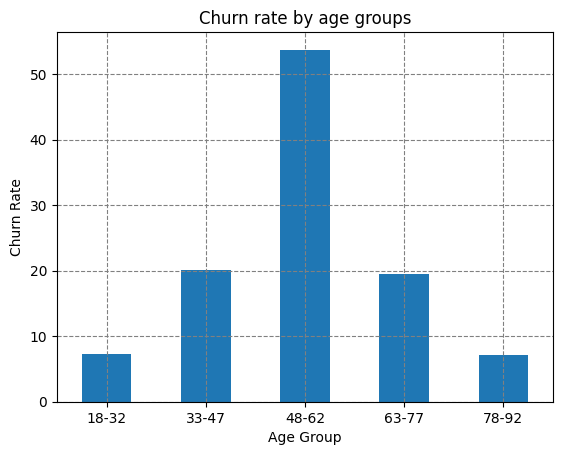

In [26]:
# Group data by age-group
# Data preparation
total =  df_train.age_group.value_counts()
grp_count = df_train[df_train.churn == 1].groupby(by=['age_group'], observed=False).count()['customer_id']
churn_rate = grp_count * 100 / total

# plot
churn_rate.plot(kind='bar', 
                title='Churn rate by age groups',
                xlabel='Age Group', 
                ylabel='Churn Rate')
plt.grid(ls='--', color='gray')
plt.xticks(rotation=0);

- *The above bar plot compares the churn rate between the different age groups.*
- *Bar plot confirms our above finding from scatter plot. The customers between the age group of 47-61 show the higher churn rate which is greater than 50%.*

In [27]:
# Student-t test to perform hypothesis test.

def ttest_(column):
    '''Hypothesis test
    H0(Null Hypothesis): There is no significant difference between the groups.
    H1(Alternative Hypothesis): There is significant difference between the groups.
    '''
    from scipy import stats
    
    # Perform the student t-test
    t_stats, p_value = stats.ttest_ind(df_train[column], df_train['churn'])
    print("T-statistics:%.f" %(t_stats))
    print("P-value:%.f" %(p_value))
    
    # Interpret the results
    alpha = 0.05 # level of significance
    if p_value < alpha:
        print("There is significant difference between the groups")
    else:
        print("There is no significant difference between the groups.")


def chi2_test(column):
    '''Hypothesis test
    H0(Null Hypothesis): colum and churn attributes are not Independent
    H1(Alternative Hypothesis): colum and churn attributes are Independent.
    '''
    
    from scipy.stats import chi2_contingency
    data = pd.crosstab(df_train[column], df_train['churn'])
    chi2, p_value, dof, expected = chi2_contingency(observed=data, correction=False)
    
    # print("Chi-square statistic: %f" %chi2)
    # print("P-value: %f" %p_value)
    # print("Degree of freedom: %f" %dof)
    
    # Interpret the results
    alpha = 0.05 # level of significance
    if p_value < alpha:
        result = True
    else:
        result = False
    return chi2, p_value, dof, result

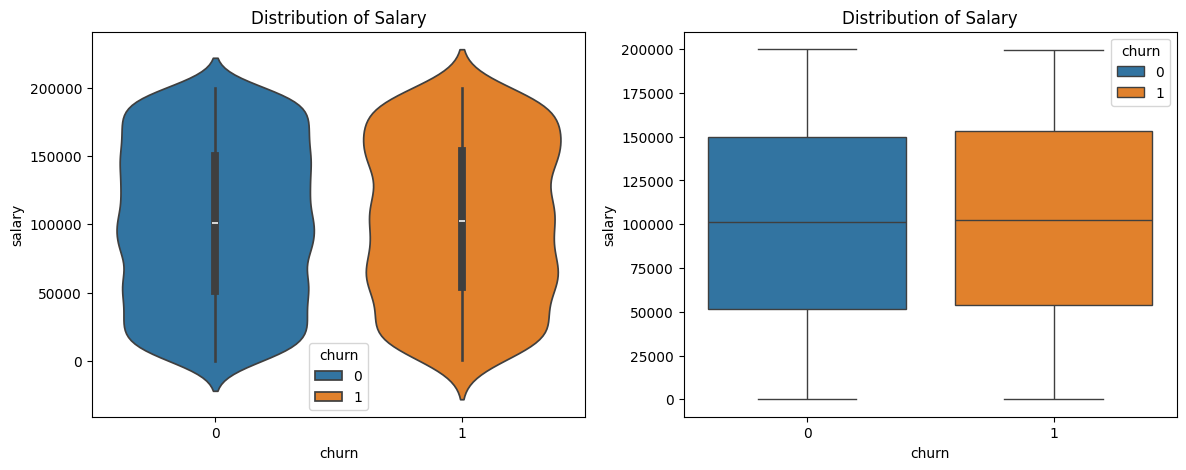

In [28]:
# Find the relation between Salary and churn rate.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.violinplot(data=df_train, 
            x='churn',
            y='salary',
            hue='churn', ax=ax1)

ax1.set_title("Distribution of Salary")

sns.boxplot(data=df_train, 
            x='churn',
            y='salary',
            hue='churn', ax=ax2)
ax2.set_title("Distribution of Salary")
plt.show()

- *The above violin and box plot shows the distributions of salary for both group of customers, the one who had churn and not churn.*
- *The violin and box plot shows similar distributions and also both groups have similar median values, suggesting no significant difference in central tendency/*
- *The symmetry and similar shapes of the distributions suggest that the mean salaries for both bgroups are likely very close.*
- *In summary, both plots indicate that there is no significant difference in the salary distribution between customers who churned and those who did not.*

Let's check statistical significance of the values using student t-test method.

In [29]:
# Statistical hypothesis test
ttest_('salary')

T-statistics:127
P-value:0
There is significant difference between the groups


- *The graphs shows that the mean salaries for both groups are likely very close. However, the student t-test shows that there is significant difference between the means of salaries for customers who churned (1) and not churned (0)*

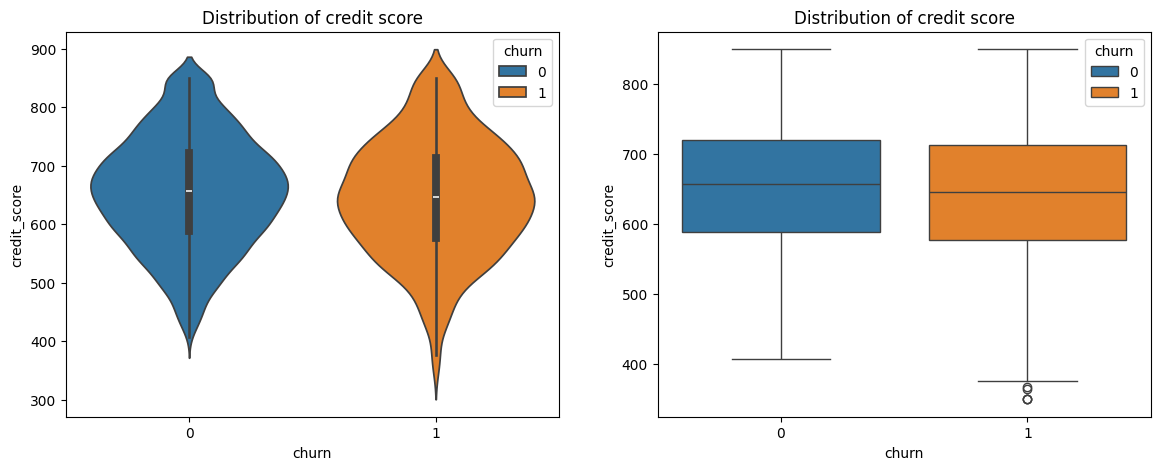

In [30]:
# Let's have a look at the distribution of credit score by different class label
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.violinplot(data=df_train, 
            x='churn',
            y='credit_score',
            hue='churn', ax=ax1)

ax1.set_title("Distribution of credit score")

sns.boxplot(data=df_train, 
            x='churn',
            y='credit_score',
            hue='churn', ax=ax2)
ax2.set_title("Distribution of credit score")
plt.show()

- *The shape and density of violin plot for credit scores shows similar distribution for both groups for customers who churned(1) and those who did not(0) indicating most of the scores are concentrated around a common range.*
- *The white dot in each violin and the horizontal line inside each box represents the median credit score. Both groups have similar median values, suggesting no significant difference in central tendency.*
- *In summary, both plots suggest that there is no significant difference in the credit score distribution between customers who churned and those who did not.*

In [31]:
# Check
ttest_('credit_score')

T-statistics:491
P-value:0
There is significant difference between the groups


- *The above graphs shows that the mean credit score for both groups are likely very close. However, the student t-test shows that there is significant difference between the means of salaries for customers who churned (1) and not churned (0)*

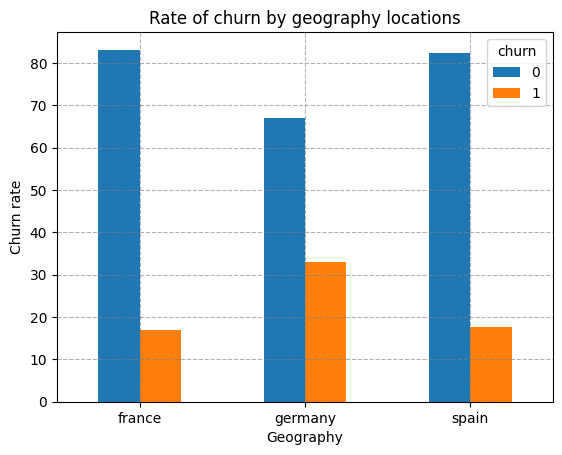

In [32]:
# Examine the relation between geography and churn rate.
churn_rate_by_geo = df_train.groupby(by=['geography', 'churn'])['customer_id'].count() * 100 / df_train.geography.value_counts()
churn_rate_by_geo.unstack().plot(kind='bar', 
                                 title='Rate of churn by geography locations', 
                                 xlabel='Geography', ylabel='Churn rate')
plt.xticks(rotation=0)
plt.grid(ls='--', c='gray', alpha=0.6);

- *The above bar plot compares the churn rate of different countries. You can see that the Germany has highest rate of churn which appx 35%.*

<Figure size 700x500 with 0 Axes>

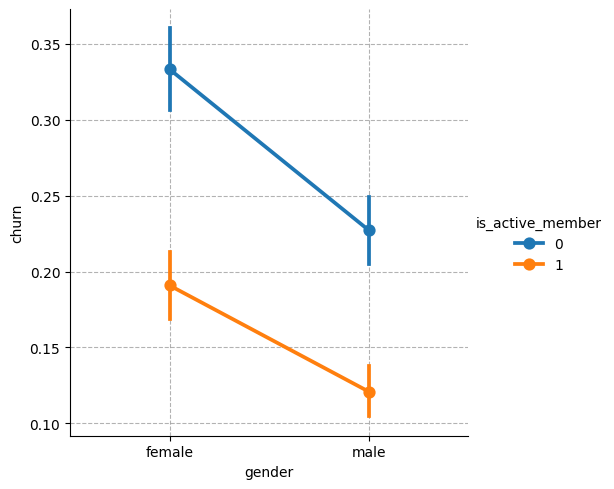

In [33]:
# Gender distribution across the category
fig = plt.figure(figsize=(7, 5))
sns.catplot(df_train, x='gender', y='churn', hue='is_active_member', kind='point')
plt.grid(ls='--', color='gray', alpha=0.6);

- *The above point categorical plot compares the churn rate between active and inactive-female and male customers*
- *The plot shows that the overall churn rate in female high compare to male regardless of there active status.*
- *In summary, both inactive female and male customer show higher churn rate. Female customers tends to churned more compare to male customers irrespective of whether they are active member or not.*

In [34]:
churn_rate_by_active = df_train.groupby(by=['is_active_member', 'churn'])['customer_id'].count() * 100 / df_train.is_active_member.value_counts()

pd.pivot_table(data=df_train, columns='churn', index='is_active_member', values='customer_id', aggfunc='count') / df_train.churn.value_counts()

churn,0,1
is_active_member,,
0,0.439024,0.624887
1,0.560976,0.375113


- So, 62% of customers who churned are in-active member, while ~38% of churned are from active members.

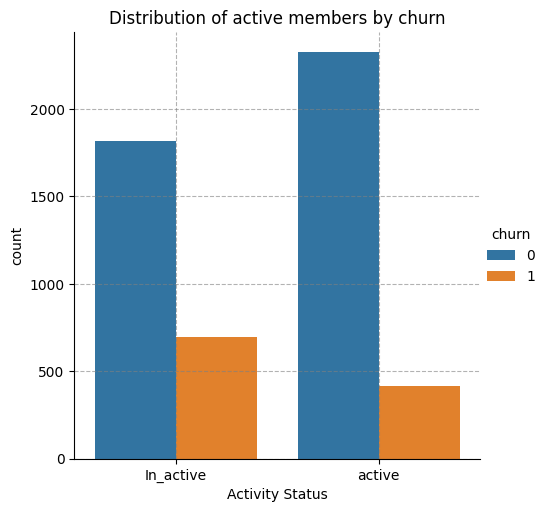

In [35]:
# Active member distributions
sns.catplot(df_train, x='is_active_member', hue='churn', kind='count')

plt.title('Distribution of active members by churn')
plt.xticks(ticks=[0, 1], labels=['In_active', 'active'])
plt.xlabel('Activity Status')

plt.grid(ls='--', color='gray', alpha=0.6);

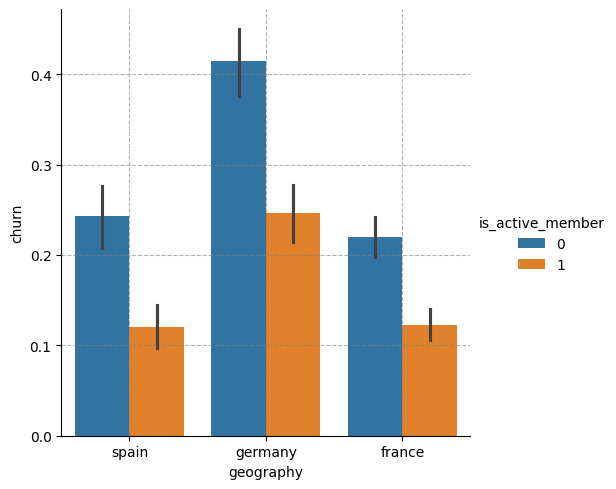

In [36]:
# Gender distribution across the category
sns.catplot(df_train, x='geography', y='churn', hue='is_active_member', kind='bar')
plt.grid(ls='--', color='gray', alpha=0.6);

- *Germany has highest rate of churn in both active and inactive members.*

In [37]:
# Calcuate the dependency between the categorical variable and target variable 'churn'.

def calculate_chi2(columns):
    corr_result = []

    for col in cat_cols[:-1]+['age_group']:
        # Compute chi-square test.
        chi2, p_value, dof, result = chi2_test(col)
        corr_result.append({
            'Feature': col, 
            'chi2-stats': chi2,
            'p-value': p_value,
            'dof': dof,
            'is_dependent': result
        })
    return pd.DataFrame(corr_result).style.highlight_max()
    
# Select every column except last 'churn' column and add new column 'age_group'.
columns = cat_cols[:-1] + ['age_group']
calculate_chi2(columns)

,Feature,chi2-stats,p-value,dof,is_dependent
0,geography,147.995093,0.000000,2,True
1,gender,62.215185,0.000000,1,True
2,tenure,9.965025,0.443567,10,False
3,num_of_products,814.324042,0.000000,3,True
4,has_cr_card,3.519306,0.060658,1,False
5,is_active_member,121.099607,0.000000,1,True
6,age_group,638.769148,0.000000,4,True


In [38]:
# Save the data
data_path = "../Data/raw/"
df_train.to_csv(data_path+'train.csv', index=False)
df_test.to_csv(data_path+'test.csv', index=False)
df_val.to_csv(data_path+'val.csv', index=False)
df_full.to_csv(data_path+'full_train.csv', index=False)

In [39]:
# Save the binning function.
import pickle
with open('../Model/age_binning_func.bin', 'wb') as f:
    pickle.dump(age_binning, f)